# Data Analysis 2

This notebook is ***NEW CONTINUING*** from previous notebooks in the [notebooks](https://github.com/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/tree/main/notebooks) folder. Therefore, before reading through this notebook, I recommend going through [Data Collection](https://github.com/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/blob/main/notebooks/dataCollection.ipynb), [Data Organization](https://github.com/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/blob/main/notebooks/dataOrganization.ipynb), and then [Data Analysis 1](https://github.com/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/blob/main/notebooks/dataAnalysis1.ipynb), in that order.

**Outline**

1. Setting Up

2. Recap

3. Spelling Error Exploration

4. Spelling Error Analysis

5. Collecting Top Errors (again)

6. Top Error Analysis

7. Summary

## Setting Up

In [1]:
# Start with importing our libraries
import language_tool_python as ltp  # Using this as a grammaticality parser
import pandas as pd 
import numpy as np
import nltk
import re

In [295]:
import matplotlib.pyplot as plt

In [2]:
# This sets up our parsing tool
tool = ltp.LanguageTool('en-US')

In [3]:
# Using pandas to read csv files in 

legalAdvice = pd.read_csv("../final-data/finalLegalData.csv", index_col = 0)
adulting = pd.read_csv('../final-data/finalAdData.csv', index_col = 0)
medicine = pd.read_csv('../final-data/finalMedData.csv', index_col = 0)
highschool = pd.read_csv('../final-data/finalHsData.csv', index_col = 0)
broadway = pd.read_csv('../final-data/finalBwayData.csv', index_col = 0)
pittsburgh = pd.read_csv('../final-data/finalPghData.csv', index_col = 0)
rant = pd.read_csv('../final-data/finalRantData.csv', index_col = 0)
ccq = pd.read_csv('../final-data/finalCcqData.csv', index_col = 0)
anime = pd.read_csv('../final-data/finalAnimeData.csv', index_col = 0)
eli5 = pd.read_csv('../final-data/finalElifData.csv', index_col = 0)
college = pd.read_csv('../final-data/finalCollegeData.csv', index_col = 0)
sports = pd.read_csv('../final-data/finalSportsData.csv', index_col = 0)
crypto = pd.read_csv('../final-data/finalCryptoData.csv', index_col = 0)
lawyertalk = pd.read_csv('../final-data/finalLawyerData.csv', index_col = 0)
gaming = pd.read_csv('../final-data/finalGamingData.csv', index_col = 0)

In [4]:
crypto

,Title,Id,Text,Author,Number of Comments,Number of Upvotes,Ratio of Upvotes
0,Moon Week 37,11t058d,Hello everyone and welcome to Moon Week for ro...,MoonWeek,668,102,0.88
1,"Daily General Discussion - March 19, 2023 (GMT+0)",11v58f9,**Welcome to the Daily General Discussion thre...,CryptoDaily-,5390,82,0.94
2,I went to the supermarket here in Venezuela an...,11vnevt,"Hi guys, as you probably know I'm Venezuelan l...",WorkingLime,630,979,0.85
3,Having An Emergency Fund Is One Of The Most Im...,11vqd67,I rarely hear people recommend having an emerg...,kirtash93,172,87,0.80
4,I just realized i lost about 900$,11vw1ps,"I was kinda active at one time in here, moved ...",KermitTheFrogo01,88,30,0.86
...,...,...,...,...,...,...,...
418,Don't Let Hackers Drain Your Crypto Wallets: S...,11t0wcb,I decided to create this post because of the e...,kirtash93,36,15,0.70
419,Storing Your Seed Phrase (give me a better ide...,11t0j05,"Obviously, there are a lot of opinions on how ...",Nonchalant_Calypso,216,25,0.75
420,Noob question about cold storage,11t0bda,I've looked into it and I still have some ques...,Randompersonxxxx,26,5,0.78
421,Moon Week 37,11t058d,Hello everyone and welcome to Moon Week for ro...,MoonWeek,697,113,0.89


In [5]:
allSportsVals = list(sports['Text'].values)
allLegalVals = list(legalAdvice['Text'].values)
allAdultVals = list(adulting['Text'].values)
allMedVals = list(medicine['Text'].values)
allHsVals = list(highschool['Text'].values)
allBwayVals = list(broadway['Text'].values)
allPghVals = list(pittsburgh['Text'].values)
allRantVals = list(rant['Text'].values)
allCcqVals = list(ccq['Text'].values)
allAnimeVals = list(anime['Text'].values)
allEli5Vals = list(eli5['Text'].values)
allCollegeVals = list(college['Text'].values)
allCryptoVals = list(crypto['Text'].values)
allLawyerVals = list(lawyertalk['Text'].values)
allGamingVals = list(gaming['Text'].values)

sportsErrors, legalErrors, adultErrors, medErrors, hsErrors, bwayErrors, pghErrors, rantErrors, ccqErrors, animeErrors, eli5Errors, collegeErrors, cryptoErrors, lawyerErrors, gamingErrors = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []


In [22]:
# Iterating through each value and using the tool
[sportsErrors.append(tool.check(x)) for x in allSportsVals]
[legalErrors.append(tool.check(x)) for x in allLegalVals]
[adultErrors.append(tool.check(x)) for x in allAdultVals]
[medErrors.append(tool.check(x)) for x in allMedVals]
[hsErrors.append(tool.check(x)) for x in allHsVals]
[bwayErrors.append(tool.check(x)) for x in allBwayVals]
[pghErrors.append(tool.check(x)) for x in allPghVals]
[rantErrors.append(tool.check(x)) for x in allRantVals]
[ccqErrors.append(tool.check(x)) for x in allCcqVals]
[animeErrors.append(tool.check(x)) for x in allAnimeVals]
[eli5Errors.append(tool.check(x)) for x in allEli5Vals]
[collegeErrors.append(tool.check(x)) for x in allCollegeVals]
[cryptoErrors.append(tool.check(x)) for x in allCryptoVals]
[lawyerErrors.append(tool.check(x)) for x in allLawyerVals]
[gamingErrors.append(tool.check(x)) for x in allGamingVals]
print("Done processing")

Done processing


## Recap

After our analysis last time, we discovered the most frequently occuring grammatical errors in each of the subreddits. Here it is again for reference:

**COMMA_COMPOUND_SENTENCE** - Legal Advice, Adulting, College

**MORFOLOGIK_RULE_EN_US** - Medicine, Highschool, Broadway, Pittsburgh, Rant, Ccq, Anime, Eli5, Sports, Cryptocurrency, Lawyer Talk, Gaming

Let's take a closer look at what each of these errors looks like.

In [287]:
# Showing an error
hsErrors[30]

[Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['English', 'enlist', 'anguish', 'Englisher', 'Englishes', 'Eilish'], 'offsetInContext': 20, 'context': 'What science, math, english/lang arts, and social studies did you l...', 'offset': 20, 'errorLength': 7, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'What science, math, english/lang arts, and social studies did you learn in grade 9?'}),
 Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Lang', 'long', 'land', 'Long', 'gang', 'lane', 'sang', 'Land', 'Lane', 'lung', 'Wang', 'Yang', 'hang', 'slang', 'bang', 'lag', 'rang', 'LNG', 'Lana', 'Sang', 'tang', 'yang', 'fang', 'Vang', 'clang', 'pang', 'lank', 'ANG', 'LAN', 'LAOG', 'ang', 'dang', 'ling', 'l ang', 'Liang', 'vang', 'being', 'and', 'an', 'any', 'can', 'many', 'along', 'band', 'large', 'last', 'line', 'late', 'law', 'man', 'range', 'King', 'San', 'fan

As seen above, we have two MORFOLOGIK_RULE_EN_US rules broken(the third rule broken is EN_CONTRACTION_SPELLING, but it is not relevant to our analysis right now). Specifically, with ruleIssueType of 'misspelling'. Let's explore just how prominent 'misspelling' ruleIssueTypes are.

## Spelling Error Exploration

In [24]:
# Declaring new list
misspellingErrors = []

In [25]:
# Function for collecting all misspelling errors

def addingErrors(subreddit):
    counter = 0
    counterAll = 0
    for x in subreddit:
        if x:
            counterAll += 1
            for y in x:
                if y.ruleIssueType == 'misspelling':
                    counter += 1
                    misspellingErrors.append(y)
                    break
    print(str(counter) + ', ' + str(counterAll))

In [26]:
# Running each subreddit through the function
addingErrors(sportsErrors)
addingErrors(legalErrors)
addingErrors(adultErrors)
addingErrors(medErrors)
addingErrors(hsErrors)
addingErrors(bwayErrors)
addingErrors(pghErrors)
addingErrors(rantErrors)
addingErrors(ccqErrors)
addingErrors(animeErrors)
addingErrors(eli5Errors)
addingErrors(collegeErrors)
addingErrors(cryptoErrors)
addingErrors(lawyerErrors)
addingErrors(gamingErrors)

1675, 1907
1224, 2180
1124, 2172
1405, 1913
1329, 1955
1276, 1828
1001, 1735
1551, 2167
1232, 1992
1851, 2077
657, 1381
1171, 2161
1886, 2188
957, 1845
1324, 1848


In [27]:
# Adding up all of the numbers

total1 =  1269 + 1301 + 1290 + 1231 + 1229 + 1178 + 1085 + 1340 + 1240 + 1372 + 828 + 1272 + 1423 + 1102 + 1192
total2 = 1153 + 823 + 766 + 977 + 916+ 902+ 718+ 1032+ 860+ 1259+ 466+ 777+ 1272+ 658+ 930
print(total1)
print(total2)

18352
13509


Wow. That means in all of the 18352 errors, 13509 of them are misspelling errors. That is 73.61% of all of the errors. Let's explore some of these misspelling errors to see whats going on.

## Spelling Error Analysis

In this instance, the language tool has detected a genuine spelling error. Using context, one can conclude that this person meant to say "one" instead of "ione".

In [44]:
# Showing an error

misspellingErrors[2203]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['one', 'done', 'gone', 'none', 'zone', 'bone', 'tone', 'cone', 'ion', 'ions', 'lone', 'hone', 'pone', 'ICNE', 'INE', 'ONE', 'i one', 'ION'], 'offsetInContext': 26, 'context': 'I (43f) have been married ione time about 20ish years ago.  We were yo...', 'offset': 26, 'errorLength': 4, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'I (43f) have been married ione time about 20ish years ago.'})

In this instance, however, the language tool has detected a spelling error, however it is not a true spelling error. The tool has an issue with the word "Embiid", when this is the last name of someone(Joel Embiid, NBA player). This isn't an actual error, but the tool believes that it is. The same thing happens in the error below it, but this time with the name of an application, 'CashApp'.

In [28]:
# Showing an error

misspellingErrors[1226]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Embed'], 'offsetInContext': 43, 'context': '...ng. Both have won one game a piece, but Embiid has outplayed Jokic H2H and visually lo...', 'offset': 175, 'errorLength': 6, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'Both have won one game a piece, but Embiid has outplayed Jokic H2H and visually looks like the better player with more dominant scoring and defense when they play each other.'})

In [74]:
# Showing an error

misspellingErrors[2311]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Shape', 'Cash', 'Sharp', 'Casual', 'Camshaft', 'Cascade', 'Sasha', 'Cashed', 'Cashier', 'Cassava', 'Champ', 'Mishap', 'Mishaps', 'ASAP', 'Caspar', 'Cathay', 'Cashes', 'Cashew', 'Cashing', 'Chap', 'Geisha', 'Pasha', 'Reshape', 'Casals', 'Tasha', 'Chaps', 'Carnap', 'Cassatt', 'Keisha', 'Cashews', 'Pashas', 'Carhop', 'Casuals', 'Cardsharp', 'Carhops', 'Cascara', 'Sashay', 'Sashays', 'Casaba', 'Catnaps', 'CASA', 'CCSPP', 'CESAP', 'CIAPP', 'SHARP', 'Asap', 'Canape', 'Cashback', 'Catnap', 'Chappy', 'Mashup', 'Mashups', 'ASCAP', 'Asha', 'Bashar', 'C-shaped', 'CASHU', 'Cassady', 'Castaño', 'Chapo', 'Dasha', 'Rashad', 'Rashawn', 'Canapé', 'Cashable', 'Cashout', 'Unsharp'], 'offsetInContext': 43, 'context': '...ent to pay a friend in Pennsylvania via CashApp for shipping my gear back to me here in...', 'offset': 43, 'errorLength': 7, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sen

In this instance, the language tool detects a spelling error, but its validity is debatable. The person who wrote the post decided to shorten "calculus" to "calc", a valid way of saying calculus online. Therefore, in the context of this post, this isn't really a grammatical error that tells us much.

In [291]:
# Showing an error

misspellingErrors[6450]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['call', 'calm', 'calf', 'CAC', 'cal', 'Cali', 'talc', 'ALC', 'CAAC', 'CAL', 'CALR', 'CALT', 'CLC', 'Cal', 'TALC', 'calk', 'Calo'], 'offsetInContext': 43, 'context': '.... (I think they take both functions and calc for science based courses.) So I need h...', 'offset': 672, 'errorLength': 4, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': '(I think they take both functions and calc for science based courses.)'})

In this instance, the language too detects a spelling error, but its validity is debatable. The tool does not like the word 'yinzer', which is a word that is used, and is seen as valid, in a particular region. Therefore, this isn't a grammatical error of much substance.

In [140]:
# Showing an error

misspellingErrors[8249]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['singer', 'inner', 'winner', 'winter', 'dinner', 'inter', 'finger', 'liner', 'winger', 'Singer', 'diner', 'finer', 'ginger', 'hinder', 'infer', 'miner', 'Ginger', 'binder', 'cinder', 'finder', 'Pinter', 'kinder', 'linger', 'linker', 'pincer', 'ringer', 'sinner', 'sinker', 'tinder', 'tinker', 'yonder', 'minder', 'winder', 'hinter', 'pinker', 'sizer', 'tinier', 'mincer', 'minter', 'winker', 'zinger', 'dinker', 'pinier', 'winier', 'Finder', 'Tinder', 'linter', 'panzer', 'sinter'], 'offsetInContext': 43, 'context': '... and political junkie asking historical yinzer questions.   What if indeed there were ...', 'offset': 53, 'errorLength': 6, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'Local history and political junkie asking historical yinzer questions.'})

In the instances below, the language tool detects spelling errors that are more relevant to what I am looking for. For example, it detects an issue with using 'an' instead of 'a', not uppercasing the letter 'I', an adjective not fitting in a sentence, and not adding an apostrophe to a word. 

In [33]:
# Showing an error

misspellingErrors[70]

Match({'ruleId': 'EN_A_VS_AN', 'message': 'Use “an” instead of ‘a’ if the following word starts with a vowel sound, e.g. ‘an article’, ‘an hour’.', 'replacements': ['an'], 'offsetInContext': 11, 'context': '67 wins is a 82% win percentage, which no other team...', 'offset': 11, 'errorLength': 1, 'category': 'MISC', 'ruleIssueType': 'misspelling', 'sentence': '67 wins is a 82% win percentage, which no other team besides the 2016-17 Warriors reached after the Spurs.'})

In [77]:
# Showing an error

misspellingErrors[3310]

Match({'ruleId': 'EN_CONTRACTION_SPELLING', 'message': 'Possible spelling mistake found.', 'replacements': ["I'm"], 'offsetInContext': 43, 'context': '... don’t feel like they would understand. Im 22f my birthday is next Wednesday and I...', 'offset': 89, 'errorLength': 2, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "Im 22f my birthday is next Wednesday and I've never been more discouraged."})

In [35]:
# Showing an error

misspellingErrors[6246]

Match({'ruleId': 'I_LOWERCASE', 'message': 'The personal pronoun “I” should be uppercase.', 'replacements': ['I'], 'offsetInContext': 0, 'context': 'i want to be fucking done with high schoo...', 'offset': 0, 'errorLength': 1, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'i want to be fucking done with high school.'})

In [36]:
# Showing an error

misspellingErrors[2936]

Match({'ruleId': 'ADJECTIVE_ADVERB', 'message': 'The word “simple” is an adjective and doesn’t fit in this context. Did you mean the adverb “simply”?', 'replacements': ['simply'], 'offsetInContext': 43, 'context': '...e out. I want to be independent, but we simple can’t afford it and don’t have anyone w...', 'offset': 398, 'errorLength': 6, 'category': 'CONFUSED_WORDS', 'ruleIssueType': 'misspelling', 'sentence': "I want to be independent, but we simple can't afford it and don't have anyone who wants to move out."})

So... what does that mean for our analysis?

Well, as we saw above, the language tool isn't always correct. It categorizes people's names, regional words, and internet slang as misspellings. Although the language tool is benefical as a whole, it was not meant to deal with online discourse in a lot of ways demonstrated over. For the purposes of this project, I believe it would be best to remove matches that have both 'ruleId' equal to 'MORFOLOGIK_RULE_EN_US' and 'ruleIssueType' equal to 'misspelling'. This would remove many of the non-typos from consideration. However, this would remove genuine typos from these errors. However, errors do not really say a lot about the grammaticality of a post in the first place.

## Collecting Top Errors (again)

Since we want to look beyond spelling errors, let's collect the top errors again for our analysis

In [141]:
# For each subreddit, append the rule id to the list
simplifiedColErrors, simplifiedSportsErrors, simplifiedLegalErrors, simplifiedAdultErrors, simplifiedMedErrors, simplifiedHsErrors, simplifiedBwayErrors, simplifiedPghErrors, simplifiedRantErrors, simplifiedCcqErrors, simplifiedAnimeErrors, simplifiedEli5Errors, simplifiedCryptoErrors, simplifiedLawyerErrors, simplifiedGamingErrors  = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
[simplifiedColErrors.append(y.ruleId) for x in collegeErrors for y in x]

[simplifiedSportsErrors.append(y.ruleId) for x in sportsErrors for y in x]
[simplifiedLegalErrors.append(y.ruleId) for x in legalErrors for y in x]
[simplifiedAdultErrors.append(y.ruleId) for x in adultErrors for y in x]
[simplifiedMedErrors.append(y.ruleId) for x in medErrors for y in x]
[simplifiedHsErrors.append(y.ruleId) for x in hsErrors for y in x]
[simplifiedBwayErrors.append(y.ruleId) for x in bwayErrors for y in x]
[simplifiedPghErrors.append(y.ruleId) for x in pghErrors for y in x]
[simplifiedRantErrors.append(y.ruleId) for x in rantErrors for y in x]
[simplifiedCcqErrors.append(y.ruleId) for x in ccqErrors for y in x]
[simplifiedAnimeErrors.append(y.ruleId) for x in animeErrors for y in x]
[simplifiedEli5Errors.append(y.ruleId) for x in eli5Errors for y in x]
[simplifiedCryptoErrors.append(y.ruleId) for x in cryptoErrors for y in x]
[simplifiedLawyerErrors.append(y.ruleId) for x in lawyerErrors for y in x]
[simplifiedGamingErrors.append(y.ruleId) for x in gamingErrors for y in x]

print("Done")

Done


In [231]:
# Create a set of all errors
allErrors = set(simplifiedColErrors + simplifiedSportsErrors + simplifiedLegalErrors + simplifiedAdultErrors 
    + simplifiedMedErrors + simplifiedHsErrors + simplifiedBwayErrors + simplifiedPghErrors + simplifiedRantErrors
   + simplifiedCcqErrors + simplifiedAnimeErrors + simplifiedEli5Errors + simplifiedCryptoErrors + 
   simplifiedLawyerErrors + simplifiedGamingErrors)

# Remove errors that do not help us in our analysis

# We have discussed this error
allErrors.remove('MORFOLOGIK_RULE_EN_US')

# This error is for the use of IDK
allErrors.remove('IDK')

# This error is for forgetting an accent on the word Pokemon. While the accent is important, it is not helpful in my analysis
allErrors.remove('POKEMON')

# This error is for starting multiple sentences the same way(Ex: 'I am going to the park. I am happy to go to the park')
allErrors.remove('ENGLISH_WORD_REPEAT_BEGINNING_RULE')

In [232]:
# Function for counting errors instead of copying this function over and over again for each subreddit
def countThis(errors, new):
    for x in allErrors:
        y = errors.count(x)
        new.append((x, y))

In [233]:
# Declaring a bunch of lists
col, sp, le, ad, med, hs, bway, pgh, rant, ccq, ani, eli5, cry, law, gam = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

# Calling function on each subreddit
countThis(simplifiedColErrors, col)
countThis(simplifiedSportsErrors, sp)
countThis(simplifiedLegalErrors, le)
countThis(simplifiedAdultErrors, ad)
countThis(simplifiedMedErrors, med)
countThis(simplifiedHsErrors, hs)
countThis(simplifiedBwayErrors, bway)
countThis(simplifiedPghErrors, pgh)
countThis(simplifiedRantErrors, rant)
countThis(simplifiedCcqErrors, ccq)
countThis(simplifiedAnimeErrors, ani)
countThis(simplifiedEli5Errors, eli5)
countThis(simplifiedCryptoErrors, cry)
countThis(simplifiedLawyerErrors, law)
countThis(simplifiedGamingErrors, gam)

In [234]:
# For each of the subreddits below, sort for the top errors
col.sort(key = lambda x: x[1])
col[1013:]

[('WANNA', 104),
 ('COMMA_PARENTHESIS_WHITESPACE', 143),
 ('EN_COMPOUNDS', 184),
 ('COMMA_COMPOUND_SENTENCE_2', 213),
 ('WHITESPACE_RULE', 220),
 ('EN_CONTRACTION_SPELLING', 259),
 ('UPPERCASE_SENTENCE_START', 677),
 ('I_LOWERCASE', 1509),
 ('COMMA_COMPOUND_SENTENCE', 2185)]

<BarContainer object of 9 artists>

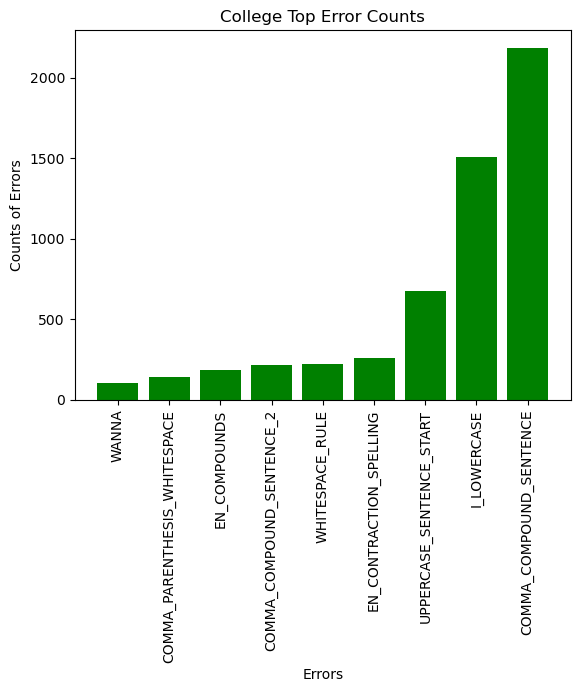

In [340]:
x = [x[0] for x in col][1013:]
y = [x[1] for x in col][1013:]
plt.xticks(rotation = 90)
plt.title("College Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'green')

In [235]:
sp.sort(key = lambda x: x[1])
sp[1013:]

[('COMMA_PARENTHESIS_WHITESPACE', 89),
 ('EN_CONTRACTION_SPELLING', 91),
 ('UPPERCASE_SENTENCE_START', 109),
 ('SENTENCE_WHITESPACE', 113),
 ('COMMA_COMPOUND_SENTENCE_2', 122),
 ('EN_DIACRITICS_REPLACE', 138),
 ('EN_UNPAIRED_BRACKETS', 148),
 ('COMMA_COMPOUND_SENTENCE', 456),
 ('WHITESPACE_RULE', 1821)]

<BarContainer object of 9 artists>

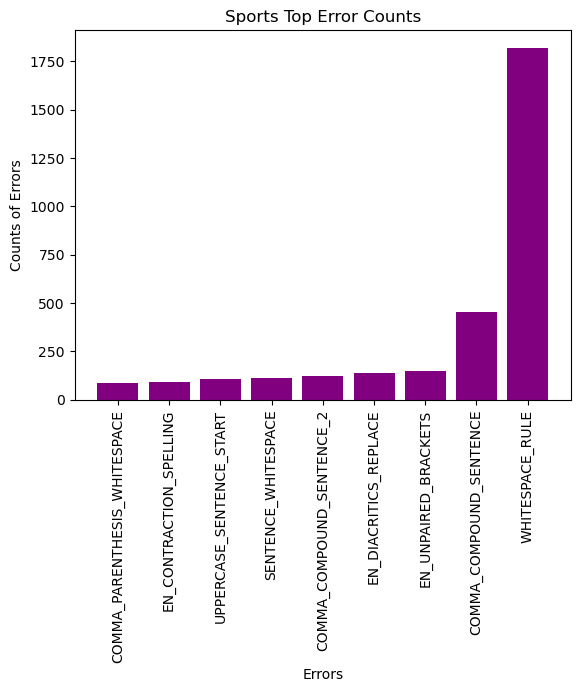

In [341]:
x = [x[0] for x in sp][1013:]
y = [x[1] for x in sp][1013:]
plt.title("Sports Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.xticks(rotation = 90)
plt.bar(x, y, color = 'purple')

In [236]:
le.sort(key = lambda x: x[1])
le[1013:]

[('POSSESSIVE_APOSTROPHE', 140),
 ('COMMA_PARENTHESIS_WHITESPACE', 181),
 ('EN_CONTRACTION_SPELLING', 203),
 ('EN_COMPOUNDS', 310),
 ('COMMA_COMPOUND_SENTENCE_2', 325),
 ('WHITESPACE_RULE', 458),
 ('UPPERCASE_SENTENCE_START', 575),
 ('I_LOWERCASE', 851),
 ('COMMA_COMPOUND_SENTENCE', 2911)]

<BarContainer object of 9 artists>

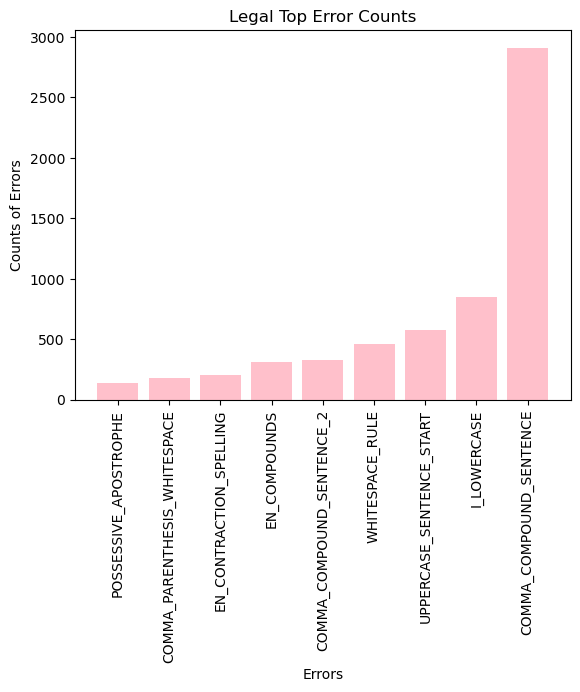

In [342]:
x = [x[0] for x in le][1013:]
y = [x[1] for x in le][1013:]
plt.xticks(rotation = 90)
plt.title("Legal Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'pink')

In [237]:
ad.sort(key = lambda x: x[1])
ad[1013:]

[('ETC_PERIOD', 105),
 ('COMMA_PARENTHESIS_WHITESPACE', 138),
 ('EN_CONTRACTION_SPELLING', 229),
 ('COMMA_COMPOUND_SENTENCE_2', 265),
 ('EN_COMPOUNDS', 268),
 ('UPPERCASE_SENTENCE_START', 502),
 ('WHITESPACE_RULE', 769),
 ('I_LOWERCASE', 993),
 ('COMMA_COMPOUND_SENTENCE', 2640)]

<BarContainer object of 9 artists>

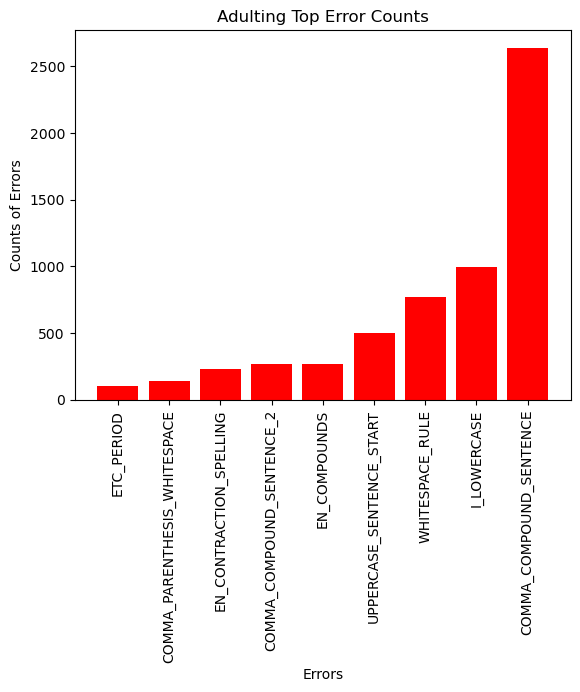

In [343]:
x = [x[0] for x in ad][1013:]
y = [x[1] for x in ad][1013:]
plt.xticks(rotation = 90)
plt.title("Adulting Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'red')

In [238]:
med.sort(key = lambda x: x[1])
med[1013:]

[('EN_UNPAIRED_BRACKETS', 74),
 ('I_LOWERCASE', 78),
 ('COMMA_PARENTHESIS_WHITESPACE', 79),
 ('COMMA_COMPOUND_SENTENCE_2', 124),
 ('EN_CONTRACTION_SPELLING', 143),
 ('UPPERCASE_SENTENCE_START', 174),
 ('EN_COMPOUNDS', 178),
 ('WHITESPACE_RULE', 598),
 ('COMMA_COMPOUND_SENTENCE', 765)]

<BarContainer object of 9 artists>

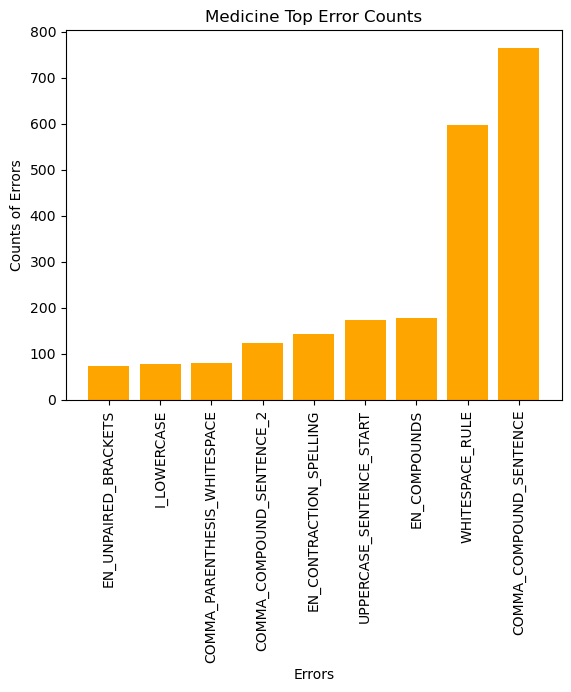

In [344]:
x = [x[0] for x in med][1013:]
y = [x[1] for x in med][1013:]
plt.xticks(rotation = 90)
plt.title("Medicine Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'orange')

In [239]:
hs.sort(key = lambda x: x[1])
hs[1013:]

[('WANNA', 117),
 ('GONNA', 132),
 ('COMMA_PARENTHESIS_WHITESPACE', 162),
 ('COMMA_COMPOUND_SENTENCE_2', 200),
 ('WHITESPACE_RULE', 338),
 ('EN_CONTRACTION_SPELLING', 361),
 ('UPPERCASE_SENTENCE_START', 1128),
 ('COMMA_COMPOUND_SENTENCE', 1879),
 ('I_LOWERCASE', 2041)]

<BarContainer object of 9 artists>

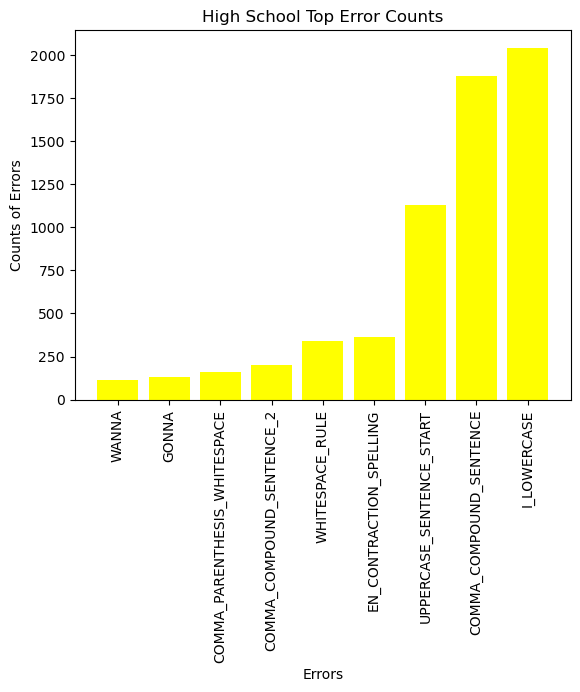

In [345]:
x = [x[0] for x in hs][1013:]
y = [x[1] for x in hs][1013:]
plt.xticks(rotation = 90)
plt.title("High School Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'yellow')

In [240]:
pgh.sort(key = lambda x: x[1])
pgh[1013:]

[('COMMA_PARENTHESIS_WHITESPACE', 65),
 ('DOUBLE_PUNCTUATION', 66),
 ('EN_COMPOUNDS', 96),
 ('I_LOWERCASE', 105),
 ('UPPERCASE_SENTENCE_START', 117),
 ('COMMA_COMPOUND_SENTENCE_2', 120),
 ('HE_VERB_AGR', 173),
 ('WHITESPACE_RULE', 234),
 ('COMMA_COMPOUND_SENTENCE', 697)]

<BarContainer object of 9 artists>

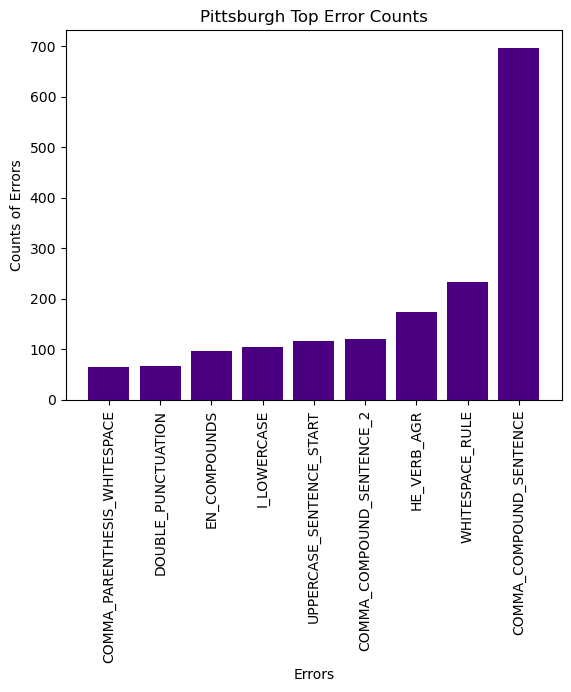

In [346]:
x = [x[0] for x in pgh][1013:]
y = [x[1] for x in pgh][1013:]
plt.xticks(rotation = 90)
plt.title("Pittsburgh Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'indigo')

In [241]:
rant.sort(key = lambda x: x[1])
rant[1013:]

[('GONNA', 165),
 ('COMMA_PARENTHESIS_WHITESPACE', 239),
 ('COMMA_COMPOUND_SENTENCE_2', 277),
 ('WHITESPACE_RULE', 361),
 ('EN_COMPOUNDS', 402),
 ('EN_CONTRACTION_SPELLING', 535),
 ('UPPERCASE_SENTENCE_START', 1142),
 ('I_LOWERCASE', 1854),
 ('COMMA_COMPOUND_SENTENCE', 2627)]

<BarContainer object of 9 artists>

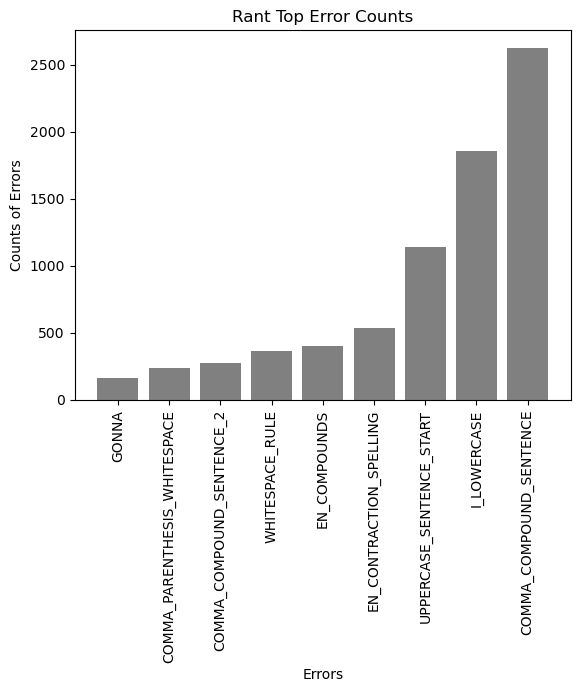

In [347]:
x = [x[0] for x in rant][1013:]
y = [x[1] for x in rant][1013:]
plt.xticks(rotation = 90)
plt.title("Rant Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'grey')

In [242]:
ccq.sort(key = lambda x: x[1])
ccq[1013:]

[('SENT_START_CONJUNCTIVE_LINKING_ADVERB_COMMA', 122),
 ('COMMA_PARENTHESIS_WHITESPACE', 147),
 ('UPPERCASE_SENTENCE_START', 192),
 ('EN_CONTRACTION_SPELLING', 197),
 ('COMMA_COMPOUND_SENTENCE_2', 199),
 ('EN_COMPOUNDS', 211),
 ('I_LOWERCASE', 447),
 ('WHITESPACE_RULE', 634),
 ('COMMA_COMPOUND_SENTENCE', 1659)]

<BarContainer object of 9 artists>

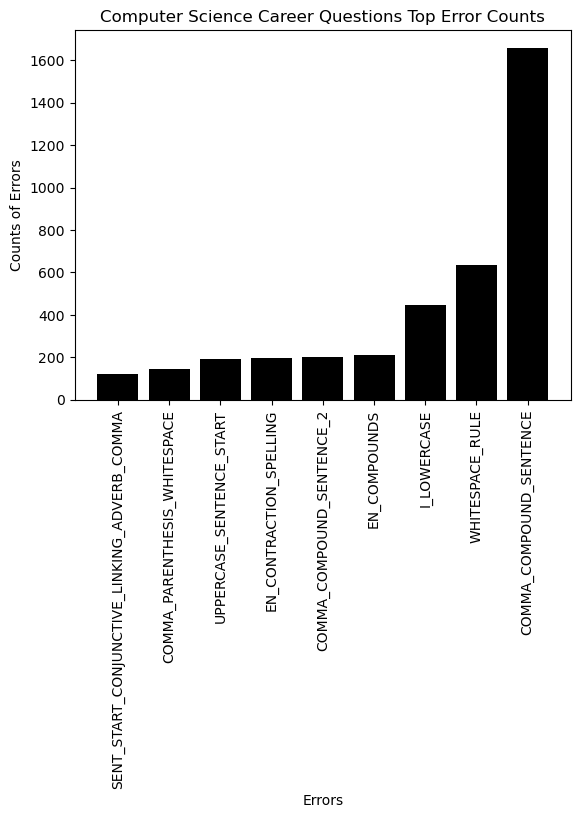

In [348]:
x = [x[0] for x in ccq][1013:]
y = [x[1] for x in ccq][1013:]
plt.xticks(rotation = 90)
plt.title("Computer Science Career Questions Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'black')

In [243]:
ani.sort(key = lambda x: x[1])
ani[1013:]

[('EN_COMPOUNDS', 128),
 ('EN_UNPAIRED_BRACKETS', 128),
 ('EN_CONTRACTION_SPELLING', 135),
 ('COMMA_PARENTHESIS_WHITESPACE', 278),
 ('UPPERCASE_SENTENCE_START', 309),
 ('SENTENCE_WHITESPACE', 328),
 ('I_LOWERCASE', 488),
 ('WHITESPACE_RULE', 623),
 ('COMMA_COMPOUND_SENTENCE', 687)]

<BarContainer object of 9 artists>

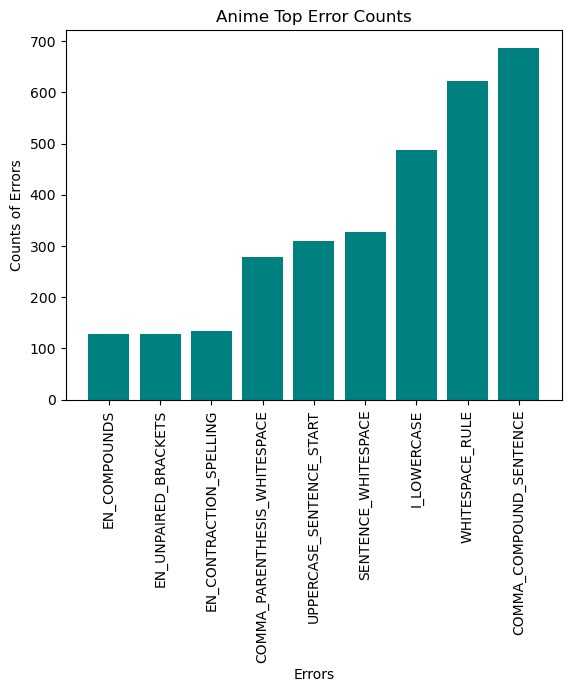

In [349]:
x = [x[0] for x in ani][1013:]
y = [x[1] for x in ani][1013:]
plt.xticks(rotation = 90)
plt.title("Anime Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'teal')

In [244]:
eli5.sort(key = lambda x: x[1])
eli5[1013:]

[('COMMA_PARENTHESIS_WHITESPACE', 41),
 ('UNIT_SPACE', 44),
 ('EN_COMPOUNDS', 53),
 ('EN_CONTRACTION_SPELLING', 73),
 ('WHITESPACE_RULE', 99),
 ('UPPERCASE_SENTENCE_START', 116),
 ('I_LOWERCASE', 134),
 ('COMMA_COMPOUND_SENTENCE_2', 157),
 ('COMMA_COMPOUND_SENTENCE', 374)]

<BarContainer object of 9 artists>

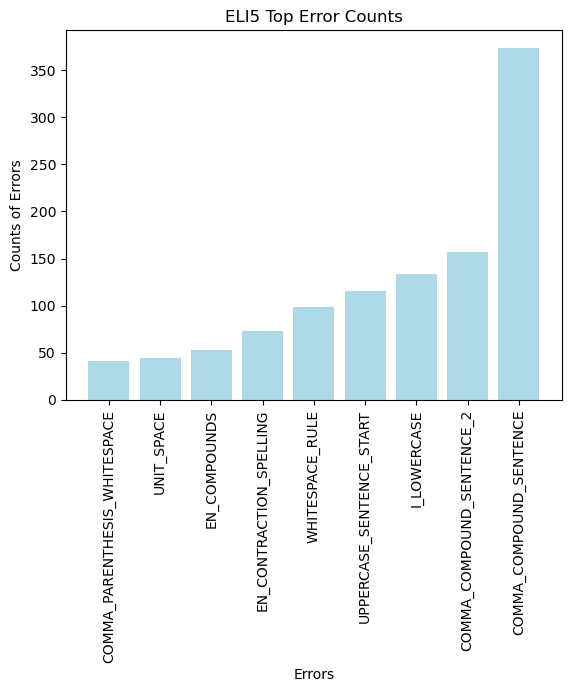

In [350]:
x = [x[0] for x in eli5][1013:]
y = [x[1] for x in eli5][1013:]
plt.xticks(rotation = 90)
plt.title("ELI5 Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'lightblue')

In [245]:
cry.sort(key = lambda x: x[1])
cry[1013:]

[('EN_CONTRACTION_SPELLING', 206),
 ('EN_UNPAIRED_BRACKETS', 231),
 ('COMMA_COMPOUND_SENTENCE_2', 233),
 ('I_LOWERCASE', 306),
 ('EN_COMPOUNDS', 315),
 ('UPPERCASE_SENTENCE_START', 318),
 ('COMMA_PARENTHESIS_WHITESPACE', 411),
 ('COMMA_COMPOUND_SENTENCE', 1330),
 ('WHITESPACE_RULE', 4413)]

<BarContainer object of 9 artists>

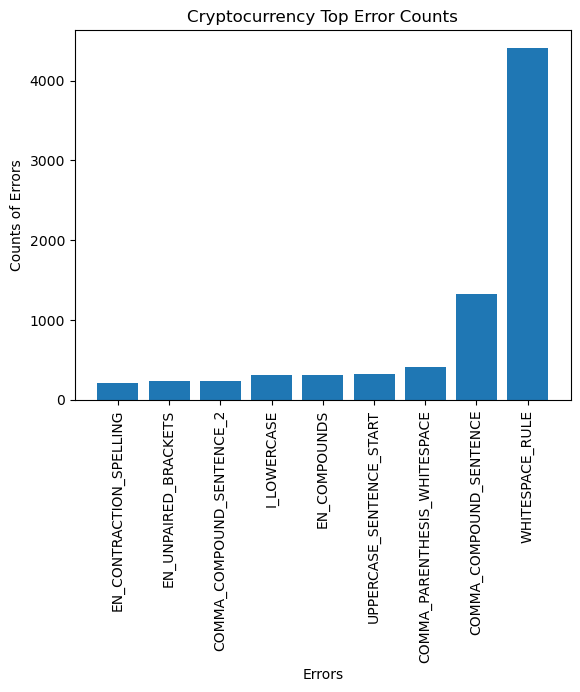

In [351]:
x = [x[0] for x in cry][1013:]
y = [x[1] for x in cry][1013:]
plt.xticks(rotation = 90)
plt.title("Cryptocurrency Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y)

In [246]:
law.sort(key = lambda x: x[1])
law[1013:]

[('AM_I', 76),
 ('EN_CONTRACTION_SPELLING', 85),
 ('HE_VERB_AGR', 100),
 ('COMMA_COMPOUND_SENTENCE_2', 159),
 ('EN_COMPOUNDS', 229),
 ('UPPERCASE_SENTENCE_START', 244),
 ('WHITESPACE_RULE', 245),
 ('I_LOWERCASE', 273),
 ('COMMA_COMPOUND_SENTENCE', 1143)]

<BarContainer object of 9 artists>

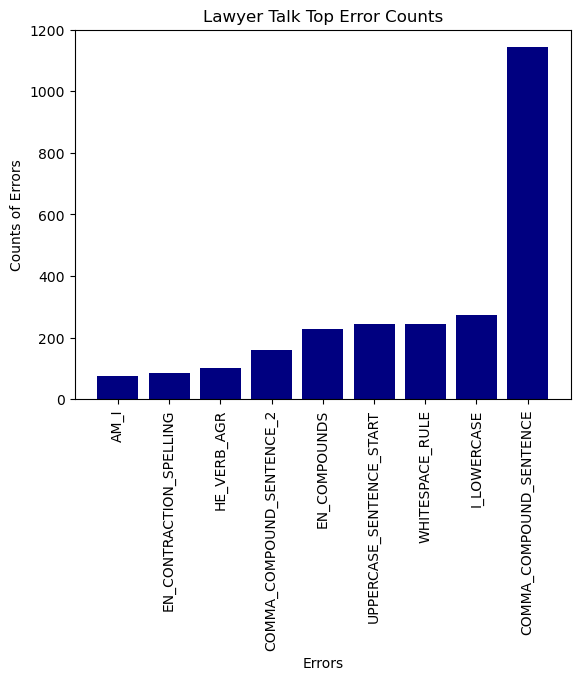

In [352]:
x = [x[0] for x in law][1013:]
y = [x[1] for x in law][1013:]
plt.xticks(rotation = 90)
plt.title("Lawyer Talk Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'navy')

In [247]:
gam.sort(key = lambda x: x[1])
gam[1013:]

[('EN_COMPOUNDS', 129),
 ('COMMA_COMPOUND_SENTENCE_2', 180),
 ('COMMA_PARENTHESIS_WHITESPACE', 194),
 ('EN_SPECIFIC_CASE', 247),
 ('EN_CONTRACTION_SPELLING', 262),
 ('WHITESPACE_RULE', 355),
 ('UPPERCASE_SENTENCE_START', 356),
 ('I_LOWERCASE', 576),
 ('COMMA_COMPOUND_SENTENCE', 964)]

<BarContainer object of 9 artists>

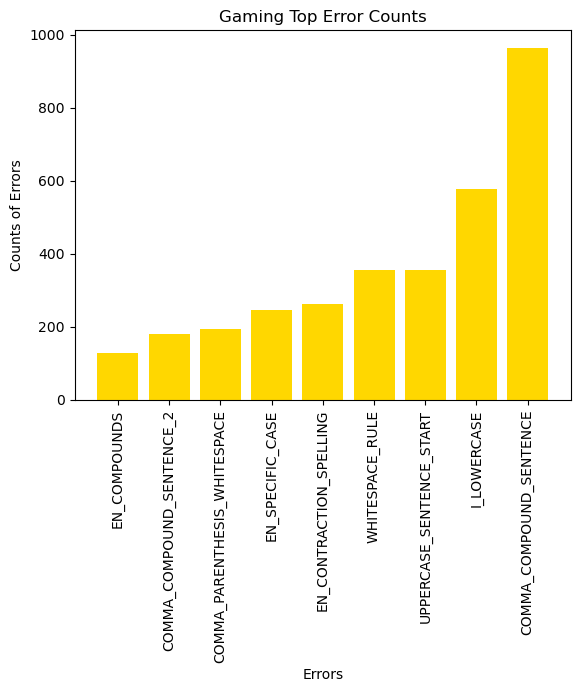

In [353]:
x = [x[0] for x in gam][1013:]
y = [x[1] for x in gam][1013:]
plt.xticks(rotation = 90)
plt.title("Gaming Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'gold')

## Top Error Analysis

Let's take a closer look at COMMA_COMPOUND_SENTENCE, as it is in the top 2 most common errors for all of the subreddits

In [179]:
sportsErrors[1]

[Match({'ruleId': 'COMMA_COMPOUND_SENTENCE', 'message': 'Use a comma before ‘and’ if it connects two independent clauses (unless they are closely connected and short).', 'replacements': [', and'], 'offsetInContext': 43, 'context': '.... “They’re still young, they’re talented and you can’t take anybody lightly, especia...', 'offset': 386, 'errorLength': 4, 'category': 'PUNCTUATION', 'ruleIssueType': 'typographical', 'sentence': "“They're still young, they're talented and you can't take anybody lightly, especially at this point in the season.”"}),
 Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Galen', 'Jaden', 'Jaylen', 'Jaén'], 'offsetInContext': 43, 'context': '...ul generation of the Rockets club. With Jalen Green, Alperen Sengun, and Jabari Smith...', 'offset': 619, 'errorLength': 5, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'With Jalen Green, Alperen Sengun, and Jabari Smith Jr., Houston is currently

"They're still young, they're talented and you can't take anybody lightly, especially at this point in the season."

"Obviously, James is one of the best players in that franchise's history and they brought on CP too."

"They had such a great team that almost knocked us off and I had a lot of respect for those Rockets teams and now I just feel old playing these young bucks"

These are just a few of the example sentences that the language tool believes is breaking the COMMA_COMPOUND_SENTENCE rule. In online discourse, it seems like this rule is most often forgotten. It could be that be due to a variety of reasons, such as someone not knowing where to appropriately place a comma in a compound sentence, or someone just not caring when it comes to online writing. In any case, it seems like this rule is the most forgotten across all of the subreddits. In fact, the ELI5 subreddit actually has COMMA_COMPOUND_SENTENCE as the top error and COMMA_COMPOUND_SENTENCE_2 as their second most common error. The COMMA_COMPOUND_SENTENCE_2 is shown below. It is a variation of the COMMA_COMPOUND_SENTENCE rule, but deals with the word 'but' instead of 'and'

In [192]:
eli5Errors[13]

[Match({'ruleId': 'COMMA_COMPOUND_SENTENCE_2', 'message': 'Use a comma before ‘but’ if it connects two independent clauses (unless they are closely connected and short).', 'replacements': [', but'], 'offsetInContext': 43, 'context': '... higher the zoom the higher the aperture but that is the best I understood from like...', 'offset': 57, 'errorLength': 4, 'category': 'PUNCTUATION', 'ruleIssueType': 'typographical', 'sentence': 'So apparently the higher the zoom the higher the aperture but that is the best I understood from like 10 different articles.'})]

Let's explore other errors that occur in the top 3 of each subreddit.

I_LOWERCASE is also another fairly common error. This one occurs when a person does not make 'I' uppercase. An example of this can be seen below. This error is most likely due to people either not caring or not realizing that it is not uppercase. In any case, a lowercase 'I' does not affect the meaning of the sentence while reading, and therefore people may not care enough to correct it.

In [201]:
gamingErrors[8]

[Match({'ruleId': 'I_LOWERCASE', 'message': 'The personal pronoun “I” should be uppercase.', 'replacements': ['I'], 'offsetInContext': 7, 'context': 'How do i get batter at the game? I keep dying in...', 'offset': 7, 'errorLength': 1, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'How do i get batter at the game?'}),
 Match({'ruleId': 'COMMA_COMPOUND_SENTENCE', 'message': 'Use a comma before ‘and’ if it connects two independent clauses (unless they are closely connected and short).', 'replacements': [', and'], 'offsetInContext': 43, 'context': "...ything at this point. I'm also burnt out and I'm only in the third area. (Undead vil...", 'offset': 235, 'errorLength': 4, 'category': 'PUNCTUATION', 'ruleIssueType': 'typographical', 'sentence': "I'm also burnt out and I'm only in the third area."})]

UPPERCASE_SENTENCE_START can be seen below. The name implies what the error is, which is that a person does not uppercase the letter at the beginning of a sentence. The cause of this error can be hypothesized similarly to the error above, which is just due to the fact that not uppercasing the first letter of a sentence has no effect on the meaning of a sentence.

In [229]:
gamingErrors[45]

[Match({'ruleId': 'UPPERCASE_SENTENCE_START', 'message': 'This sentence does not start with an uppercase letter.', 'replacements': ['Or'], 'offsetInContext': 37, 'context': 'A new game living up to your hype?   or   A game that exceeds all your expectat...', 'offset': 37, 'errorLength': 2, 'category': 'CASING', 'ruleIssueType': 'typographical', 'sentence': 'or'}),
 Match({'ruleId': 'COMMA_COMPOUND_SENTENCE', 'message': 'Use a comma before ‘but’ if it connects two independent clauses (unless they are closely connected and short).', 'replacements': [', but'], 'offsetInContext': 43, 'context': '...Thinking it would be mid or bad at first but you end up loving it when you actually ...', 'offset': 125, 'errorLength': 4, 'category': 'PUNCTUATION', 'ruleIssueType': 'typographical', 'sentence': 'A game that exceeds all your expectations (Thinking it would be mid or bad at first but you end up loving it when you actually play it)?'})]

COMMA_PARENTHESIS_WHITESPACE is regarding putting a space in between a word and a comma. This is a very simple error to make, just simply adding an extra space on accident. I don't think this has a huge effect on the grammaticality of a sentence.

In [260]:
cryptoErrors[13]

[Match({'ruleId': 'EN_COMPOUNDS', 'message': 'This word is normally spelled with a hyphen.', 'replacements': ['back-ups'], 'offsetInContext': 43, 'context': '...honest most of us do not have necessary back ups or plans for all of them. Will you be a...', 'offset': 106, 'errorLength': 8, 'category': 'MISC', 'ruleIssueType': 'misspelling', 'sentence': "There are many things that can go wrong with crypto, and let's be honest most of us do not have necessary back ups or plans for all of them."}),
 Match({'ruleId': 'COMMA_PARENTHESIS_WHITESPACE', 'message': 'Put a space after the comma, but not before the comma.', 'replacements': [','], 'offsetInContext': 43, 'context': '...These are questions we never want to see , but we *should* be able to answer them ...', 'offset': 655, 'errorLength': 2, 'category': 'TYPOGRAPHY', 'ruleIssueType': 'whitespace', 'sentence': 'These are questions we never want to see , but we *should* be able to answer them just in case.'}),
 Match({'ruleId': 'EVERYDAY_EVE

WHITESPACE_RULE is similar to the error above. It just entails adding an additional space in between words. Again, this doesn't tell me a lot about the grammaticality of a post.

In [276]:
animeErrors[40]

[Match({'ruleId': 'WHITESPACE_RULE', 'message': 'Possible typo: you repeated a whitespace', 'replacements': [' '], 'offsetInContext': 8, 'context': 'What are  some of  the examples of characters savi...', 'offset': 8, 'errorLength': 2, 'category': 'TYPOGRAPHY', 'ruleIssueType': 'whitespace', 'sentence': "What are  some of  the examples of characters saving others while the person himself doesn't move out of the way and just stand there like he accepted his fate"}),
 Match({'ruleId': 'SOME_OF_THE', 'message': 'If the text is a generality, ‘of the’ is not necessary.', 'replacements': ['some'], 'offsetInContext': 10, 'context': 'What are  some of  the examples of characters saving others wh...', 'offset': 10, 'errorLength': 12, 'category': 'REDUNDANCY', 'ruleIssueType': 'style', 'sentence': "What are  some of  the examples of characters saving others while the person himself doesn't move out of the way and just stand there like he accepted his fate"})]

## Summary

What have I discovered? Well, it seems like the language tool, while overall beneficial, also has its own issues in regards to what I am trying to analyze. Specifically, this tool is not equipped to deal with people's names, internet slang, or regional words. It marks these words as errors, which is not helpful for my analysis. In addition, it often has an issue with the way sentences are formatted, such as adding an additional space in between words. Although this is an error when parsing, it is not a helpful error for my project. 

However, I did uncover some interesting things about the top errors of the subreddits. COMMA_COMPOUND_SENTENCE is extremely prevalent in all of the subreddits. In fact, if you look at the graphs, this error is often times much larger than any other error in the graph. This error is when a person does not include a comma in a compound sentence. This shows me that people often either do not know or do not feel that a comma in their compound sentence is important enough to include. This is interesting, as a lack of comma could sometimes lead to a change in the meaning of a sentence.

In [338]:
allText = str(allSportsVals) + str(allLegalVals) + str(allAdultVals) + str(allMedVals) + str(allHsVals)  + str(allBwayVals)  + str(allPghVals) + str(allRantVals) + str(allCcqVals) + str(allAnimeVals) + str(allEli5Vals) + str(allCollegeVals) + str(allCryptoVals) + str(allLawyerVals) + str(allGamingVals)

In [ ]:
textTok = nltk.sent_tokenize(allText) 

In [ ]:
textTok[1]